In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [55]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [56]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [57]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [58]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, output=True):
  np.random.seed(211)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W)
    if output and i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [59]:
X_st = X.copy().astype(np.float64)
for i in range(1, 3):
    X_st[i] = calc_std_feat(X[i])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [63]:
eval_model_reg2(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4)

1000 [29.32400399  3.31607187 -3.74161852 16.20707712] 53.890831851026135
2000 [37.3300907   4.80723467 -1.89264333 11.62839755] 44.550984722358564
3000 [41.95261778  5.39750465 -0.55380638  8.98315931] 41.40768087738043
4000 [44.63855592  5.70266679  0.26202925  7.44590715] 40.33759345568483
5000 [46.20160604  5.87500263  0.7420563   6.55129   ] 39.97184130062493
6000 [47.11153434  5.97460015  1.02223288  6.03048503] 39.846094716552315
7000 [47.64129403  6.03248494  1.18545254  5.72727211] 39.802441378505975
8000 [47.94972612  6.06617215  1.28049488  5.55073802] 39.78704520049178
9000 [48.12929966  6.08578339  1.33583182  5.44795737] 39.78147764832252
10000 [48.23385004  6.09720108  1.36805007  5.38811694] 39.779387405538486


array([48.23385004,  6.09720108,  1.36805007,  5.38811694])

In [64]:
lambda_arr = np.logspace(-8, 1, 9)
lambda_arr

array([1.00000000e-08, 1.33352143e-07, 1.77827941e-06, 2.37137371e-05,
       3.16227766e-04, 4.21696503e-03, 5.62341325e-02, 7.49894209e-01,
       1.00000000e+01])

In [108]:
w_arr = []
for lmd in lambda_arr:
    w = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmd, output=False)
    w_arr.append(w)
w_arr    

[array([46.24729209,  5.88266984,  0.75296495,  6.52560121]),
 array([46.24723566,  5.88266037,  0.75295147,  6.52563294]),
 array([46.24648317,  5.88253412,  0.75277176,  6.52605607]),
 array([46.23645152,  5.88085087,  0.75037606,  6.53169685]),
 array([46.1031943 ,  5.85847422,  0.71857469,  6.60662211]),
 array([44.41423818,  5.57202466,  0.31927089,  7.55539193]),
 array([31.50505347,  3.12465525, -2.3707783 , 14.70914577]),
 array([15.90637685, -0.64692366, -2.43080506, 20.89974894]),
 array([ 6.4216153 ,  0.52209111,  0.40396009, 11.1001813 ])]

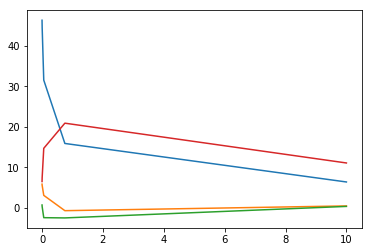

In [109]:
w_arr = np.array(w_arr)
for i in range(len(w_arr[0])):
    plt.plot(lambda_arr, w_arr[:, i])
plt.show()    

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([ 450.,  605.,  760.,  915., 1070., 1225., 1380., 1535., 1690.,
        1845., 2000.]),
 <a list of 10 Patch objects>)

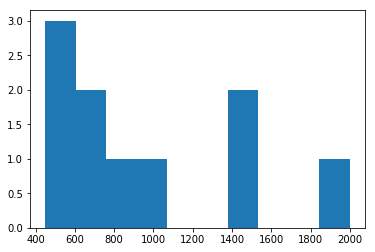

In [67]:
plt.hist(X[2])

In [77]:
X_s = X[2].copy()
X_s = X_s.astype(np.float64)
X_s = (X_s - X_s.mean()) / X_s.std()

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

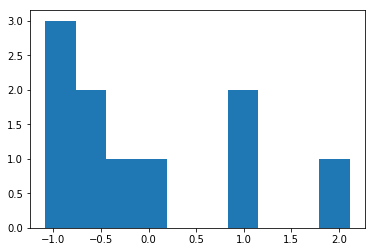

In [78]:
plt.hist(X_s)

In [85]:
X_s = (X_s - X_s.min()) / (X_s.max() - X_s.min())

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

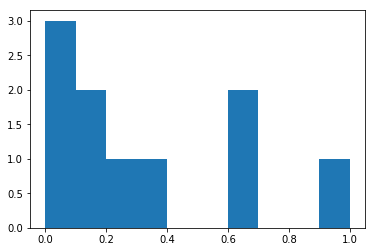

In [87]:
plt.hist(X_s)

In [92]:
X_s = X[2].copy()
X_s = X_s.astype(np.float64)
X_s = (X_s - X_s.min()) / (X_s.max() - X_s.min())
X_s = (X_s - X_s.mean()) / X_s.std()

(array([3., 2., 1., 1., 0., 0., 2., 0., 0., 1.]),
 array([-1.08270439, -0.76304881, -0.44339323, -0.12373764,  0.19591794,
         0.51557352,  0.8352291 ,  1.15488469,  1.47454027,  1.79419585,
         2.11385144]),
 <a list of 10 Patch objects>)

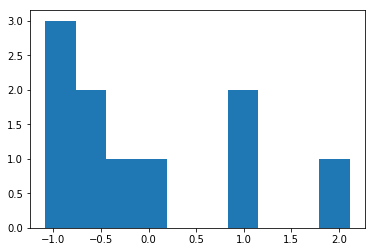

In [93]:
plt.hist(X_s)

#### Если последовательность стандартизация->нормализация, то операции дополняют друг друга, в обратном порядке 
##### нормализация эффекта не имеет.

### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [112]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, output=True):
  np.random.seed(211)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * np.sign(W)))
    if output and i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [113]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [23.26865901  1.44761848 -4.39831813 19.66614078] 64.53100548965539
1000 [29.33047257  3.31814128 -3.74146838 16.20381688] 53.88156690318486
1500 [33.89124718  4.26626493 -2.7870525  13.59609963] 47.95274481599707
2000 [37.34808875  4.81137589 -1.88975476 11.61854316] 44.53594291731076
2500 [39.97780718  5.16097314 -1.14192865 10.11377079] 42.54997411917998
3000 [41.98191145  5.40307782 -0.54763576  8.96684095] 41.39329214178828
3500 [43.5105823   5.57867461 -0.08523372  8.09194298] 40.71927939660019
4000 [44.67705769  5.70940391  0.27085099  7.42432368] 40.32649938960578
4500 [45.56735355  5.80790183  0.54393095  6.91476176] 40.09758669828443
5000 [46.24694572  5.88259141  0.75288009  6.5257934 ] 39.96417037993331


array([46.24694572,  5.88259141,  0.75288009,  6.5257934 ])

In [126]:
w_arr = []
for lmd in lambda_arr:
    w = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmd, output=False)
    w_arr.append(w)
w_arr  

[array([46.24729663,  5.8826706 ,  0.75296604,  6.52559866]),
 array([46.2472962 ,  5.8826705 ,  0.75296593,  6.5255989 ]),
 array([46.24729042,  5.8826692 ,  0.75296452,  6.5256021 ]),
 array([46.24721344,  5.88265183,  0.75294566,  6.52564482]),
 array([46.24618658,  5.88242021,  0.75269404,  6.5262147 ]),
 array([46.23244853,  5.87934079,  0.74931075,  6.53383966]),
 array([46.04195036,  5.83955426,  0.69986497,  6.63970989]),
 array([4.32259698e+01, 5.23558758e+00, 5.42077185e-03, 8.20818221e+00]),
 array([ 2.67897789e+01, -7.08942797e-03, -3.14913532e-02,  1.65369630e+01])]

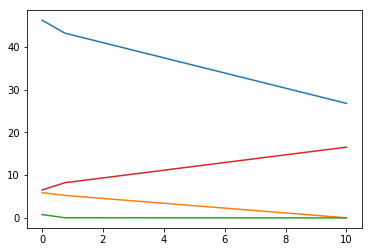

In [127]:
w_arr = np.array(w_arr)
for i in range(len(w_arr[0])):
    plt.plot(lambda_arr, w_arr[:, i])
plt.show()    